### Phase Diagram for In-Section Exercise in Handout 1
Last update: 09/11/16

#### Before you run:
- Read comments some of which suggest you revise or delete lines of code.

#### Tasks:
- Run 0_setpath
- Parameterization, solve steady state, and equation for saddle path.
- Plot phaselines, arrows in regions, and saddle path.

In [27]:
%run 0_setpath.ipynb # You need to delete this line as it runs another ipython notebook code.

In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # To adjust screen display

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [30]:
delta = 0.2
beta = 0.95
gamma = 1
theta = 1
n = 1000
omega_max = 6
omega = np.linspace(-omega_max,omega_max,n)
labor_1 = delta*omega # \Delta \Omega = 0
labor_2 = -(gamma/(delta+beta))*omega + (theta/(delta+beta)) # \Delta L^c_t = 0
omega_ss = theta/(gamma+delta*(delta+beta))
labor_ss = delta*omega_ss

A11=(1-delta)
A12= 1.0
A21=gamma
A22 = (1+delta+beta)

A = np.matrix([[(1-delta), 1], [gamma,  (1+delta+beta)]]) #A = np.matrix([[A11, A12], [A21, A22]])
eta, E = np.linalg.eig(A) 
# Results: eta = array([ 0.26850715,  2.68149285]), E = matrix([[-0.88302686, -0.46932246], [ 0.46932246, -0.88302686]])
saddle_slope = E.item(1,0)/E.item(0,0)
labor_saddle = saddle_slope*(omega-omega_ss) + labor_ss

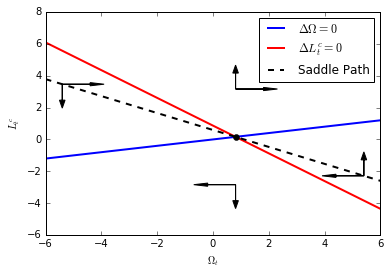

In [24]:
fig, ax = plt.subplots()
ax.plot(omega, labor_1,'b-',label='$\Delta \Omega = 0$', linewidth=2)
ax.plot(omega, labor_2,'r-',label='$\Delta L^c_t = 0$', linewidth=2)
ax.plot(omega, labor_saddle,'k--',label='Saddle Path', linewidth=2)
ax.plot(omega_ss,labor_ss, 'ko')
ax.arrow(omega[50], labor_saddle[50], 0, -1, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega[50], labor_saddle[50], 1, 0, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega[n-50], labor_saddle[n-50], 0, 1, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega[n-50], labor_saddle[n-50], -1, 0, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega_ss, labor_ss-3, 0, -1, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega_ss, labor_ss-3, -1, 0, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega_ss, labor_ss+3, 0, 1, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(omega_ss, labor_ss+3, 1, 0, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.legend()
ax.set_xlabel("$\Omega_t$")
ax.set_ylabel("$L^c_t$")
plt.show()
fig.tight_layout()
fig.savefig(pathSolFig1+'ht1_sol_insec_pd.png',bbox_inches='tight',dpi = 100) # Delete "pathSolFig1+" as it is defined in 0_setpath.ipynb